## HW1: Linear Regression using Gradient Descent
In hw1, you need to implement linear regression by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get no points by simply calling sklearn.linear_model.LinearRegression

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import random

## Load data

In [8]:
train_df = pd.read_csv("train_data.csv")
x_train, y_train = train_df['x_train'], train_df['y_train']

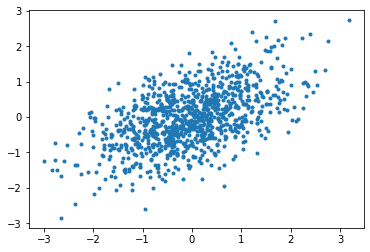

In [9]:
plt.plot(x_train, y_train, '.')

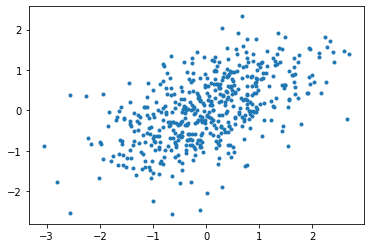

In [10]:
test_df = pd.read_csv("test_data.csv")
x_test, y_test = test_df['x_test'], test_df['y_test']
plt.plot(x_test, y_test, '.')

## Train your model 
### Pseudo code:
1. Random initialize the weights, intercepts of the linear model

**for i in range(iteration)**

    2. Feed foward the training data into the model, get the output prediction
    3. Calculating training loss by Mean Square Error of predcition and ground truth data
    4. Calculating the gradients
    5. Updating the weights and intercepts by the gradients * learning rate 
    
**End of training**

In [11]:
def linear_regression(X, y, m_current=0, b_current=0, epochs=1000, learning_rate=0.0001):
     N = float(len(y))
     for i in range(epochs):
          y_current = (m_current * X) + b_current
          cost = sum([data**2 for data in (y-y_current)]) / N
          m_gradient = -(2/N) * sum(X * (y - y_current))
          b_gradient = -(2/N) * sum(y - y_current)
          m_current = m_current - (learning_rate * m_gradient)
          b_current = b_current - (learning_rate * b_gradient)
     return m_current, b_current, cost

In [12]:
# m, c, cost = linear_regression(x_train, y_train, epochs=100000)
# print('epochs=10000 results:')
# print('m:', m)
# print('c:', c)
# print('cost:', cost)

In [13]:
m, c, cost = linear_regression(x_train, y_train, epochs=10000)
print('m:', m)
print('c:', c)
print('cost:', cost)

m: 0.38555442871941026
c: -0.006761639091419863
cost: 0.4752067817528394


In [14]:
# # building model
# m = 0
# c = 0
# L = 0.0001  # learning Rate
# epochs = 10000  # The number of iterations to perform gradient descent

# X = x_train
# Y = y_train
# n = float(len(X)) # Number of elements in X

# # Performing Gradient Descent 
# for i in range(epochs): 
#     Y_pred = m*X + c  # The current predicted value of Y
#     D_c = (-2/n) * sum(Y - Y_pred)  # Derivative wrt c
#     D_m = (-2/n) * sum(X * (Y - Y_pred))  # Derivative wrt m
#     c = c - L * D_c  # Update c
#     m = m - L * D_m  # Update m 
    
# print (m, c)

In [30]:
def model_loss_MSE(x_data, y_data, L=0.001, epochs=10000):
    """Construct a Linear regression model(y = b0 + b1x) with MSE as loss function.

    Arguments:
    L -- learning rate
    epochs -- number of iterations
    """
    # random initialize b0, b1 between [-1, 1]
    b0 = random.uniform(-1, 1)
    b1 = random.uniform(-1, 1)
    print('initial b0, b1:', b0, b1)

    X = x_data
    Y = y_data
    n = float(len(X))

    record_MSE, record_MAE = [], [] # keep track of loss

    # Gradient Descent 
    for i in range(epochs): 
        Y_current = b0 + b1 * X  # The current predicted value
        
        MSE_loss = sum([tmp**2 for tmp in (Y - Y_current)]) / n
        MAE_loss = sum(abs(Y - Y_current)) / n

        D_b0 = (-2/n) * sum(Y - Y_current)  # Derivative wrt b0
        D_b1 = (-2/n) * sum(X * (Y - Y_current))  # Derivative wrt b1
        b0 = b0 - L * D_b0  # Update b0
        b1 = b1 - L * D_b1  # Update b1

        record_MSE.append(MSE_loss)
        record_MAE.append(MAE_loss)
    
    return b0, b1, record_MSE, record_MAE

initial b0, b1: 0.9959168857486165 0.29317797390812506
-0.0012671999754420267 0.4527345691900752
final MSE: 0.4708945584926661
final MAE: 0.5503357960068421


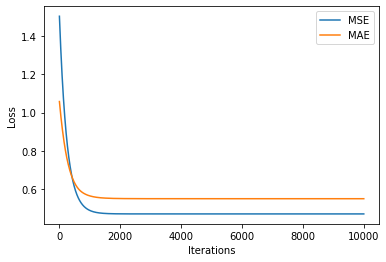

In [39]:
B0, B1, record_MSE, record_MAE = model_loss_MSE(x_train, y_train, epochs=10000)
print(B0, B1)
print('final MSE:', record_MSE[-1])
print('final MAE:', record_MAE[-1])

# draw matplotlib figure
x = range(0, len(record_MSE))
y1 = record_MSE
y2 = record_MAE
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.plot(x, y1, label='MSE')
plt.plot(x, y2, label='MAE')
plt.legend()
plt.show()

## Test the performance on the testing data
Inference the test data (x_test) by your model and calculate the MSE of (y_test, y_pred)

In [15]:
test_data = pd.read_csv("test_data.csv")
x_test, y_test = test_data['x_test'], test_data['y_test']

In [16]:
# y_pred = model(x_test)
y_pred = B0 + B1 * x_test

In [17]:
n = len(y_test)
sum_of_square = 0
sum_of_abs = 0
for i in range(n):
    sum_of_square += (y_pred[i] - y_test[i])**2
    sum_of_abs += abs(y_pred[i] - y_test[i])
MSE = sum_of_square / n
MAE = sum_of_abs / n
print(MSE)
print(MAE)

0.490902564299265
0.5613177327459704
